### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [1]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")

In [2]:
df = df.drop(columns=["Unnamed: 0", "train"])

In [3]:
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

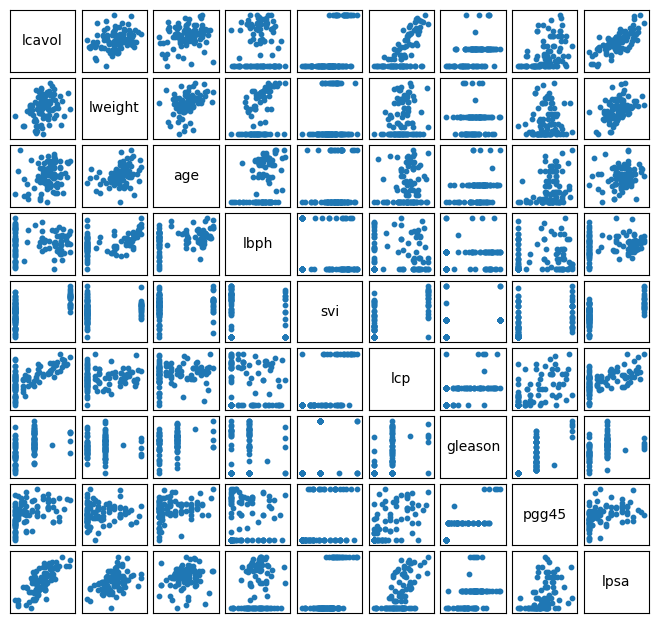

In [4]:
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

Ipsa, lcp

Datatypes: 

In [5]:
df.dtypes

lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
dtype: object

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

In [6]:
import numpy as np

corr_matrix = np.zeros((df.shape[1], df.shape[1]))

array = df.to_numpy()

for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        x_i = array[:, i]  # all 9 rows, column i
        x_j = array[:, j]  # all 9 rows, column j                            
        stdx = np.std(x_i)
        stdy = np.std(x_j)
        cov = np.cov(x_i, x_j)
        corr_matrix[i, j] = cov[0, 1]/(stdx*stdy)
        corr_df = pd.DataFrame(corr_matrix, columns=df.columns[:9], index=df.columns[:9])
print(corr_df)

           lcavol   lweight       age      lbph       svi       lcp   gleason  \
lcavol   1.010417  0.283443  0.227344  0.027635  0.544458  0.682345  0.436921   
lweight  0.283443  1.010417  0.351594  0.446871  0.157003  0.166251  0.057475   
age      0.227344  0.351594  1.010417  0.353834  0.118884  0.128998  0.271693   
lbph     0.027635  0.446871  0.353834  1.010417 -0.086737 -0.007072  0.078631   
svi      0.544458  0.157003  0.118884 -0.086737  1.010417  0.680123  0.323750   
lcp      0.682345  0.166251  0.128998 -0.007072  0.680123  1.010417  0.520193   
gleason  0.436921  0.057475  0.271693  0.078631  0.323750  0.520193  1.010417   
pgg45    0.438169  0.108472  0.278989  0.079277  0.462415  0.638107  0.759737   
lpsa     0.742111  0.437833  0.171359  0.181682  0.572116  0.554530  0.372830   

            pgg45      lpsa  
lcavol   0.438169  0.742111  
lweight  0.108472  0.437833  
age      0.278989  0.171359  
lbph     0.079277  0.181682  
svi      0.462415  0.572116  
lcp      

In [7]:
df.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


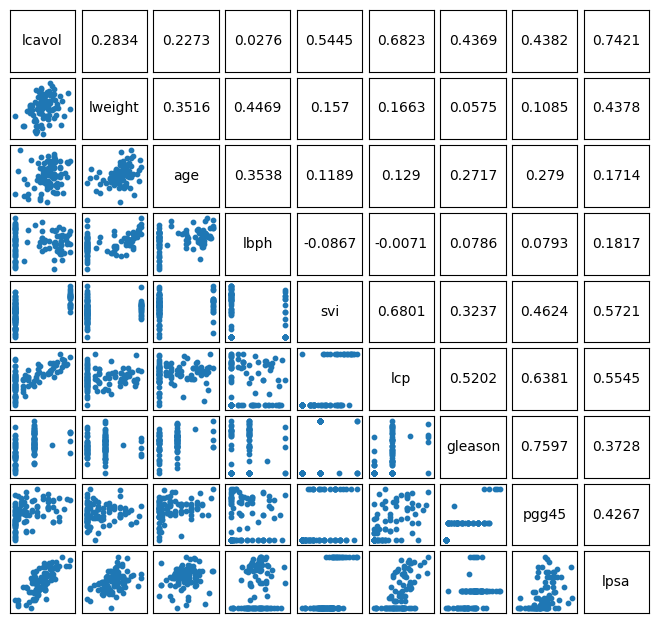

In [8]:
# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i > j:
                axij.scatter(df[i_name], df[j_name], s=10)
            elif i == j:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)
            elif i < j:  # i > j
                axij.text(0.5, 0.5, np.round(corr_matrix[i, j], 4), fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)
    return fig, ax

fig, ax = pairplot(df)
plt.show()

Explain difference between numpy and pandas df.corr 

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

$$lcavol = \beta_0 + \beta_1 \text{lweight} + \beta_2 \text{age} + \beta_3 \text{lbph} + \beta_4 \text{lcp} + \beta_5 \text{pgg45} + \beta_6 \text{lpsa} + \sum_{k \in \{0,1\}} {\beta}_{svi,k} X_{svi,k} + \sum_{j \in \{6, 7, 8, 9\}} \beta_{gleason,j} X_{gleason,j} + \varepsilon$$

Definition of parameters:

$\beta_0$ : Intercept, the constant term of the model.

$\beta_1, ..., \beta_6$: The parameters are the coefficients/slopes for the continuous predictors (lweight, age, lbph, lcp, pgg45, lpsa). They represent how much lcavol will change when the corresponding predictor change by 1 unit and all the others are held constant.

$X_{svi,k}$ and $X_{gleason,j}$: The indicator variables for the categorical predictors svi and gleason. They are binary dummy variables indicating whether it belongs to that specific category or not. For example $X_{gleason,6}$ is 1 if the gleason value is 6 and otherwise it's 0.

$\beta_{svi,k}$ and $\beta_{gleason,j}$: The coefficients for the categorical predictors. They represent the expected difference in lcavol of being in a specific category compared to the reference.

$\varepsilon$: This is the error term and represents the random noise

In [9]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?



- Not sure
- The columns are completely correlated, so if we did not drop one of them the matrix would not be invertible.
- We need a second intercept parameter for the cases that are not baseline.

In [10]:
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
print(df_enc)

      lcavol   lweight  age      lbph       lcp  pgg45      lpsa  svi_1  \
0  -0.579818  2.769459   50 -1.386294 -1.386294      0 -0.430783    0.0   
1  -0.994252  3.319626   58 -1.386294 -1.386294      0 -0.162519    0.0   
2  -0.510826  2.691243   74 -1.386294 -1.386294     20 -0.162519    0.0   
3  -1.203973  3.282789   58 -1.386294 -1.386294      0 -0.162519    0.0   
4   0.751416  3.432373   62 -1.386294 -1.386294      0  0.371564    0.0   
..       ...       ...  ...       ...       ...    ...       ...    ...   
92  2.830268  3.876396   68 -1.386294  1.321756     60  4.385147    1.0   
93  3.821004  3.896909   44 -1.386294  2.169054     40  4.684443    1.0   
94  2.907447  3.396185   52 -1.386294  2.463853     10  5.143124    1.0   
95  2.882564  3.773910   68  1.558145  1.558145     80  5.477509    1.0   
96  3.471966  3.974998   68  0.438255  2.904165     20  5.582932    1.0   

    gleason_7  gleason_8  gleason_9  intercept  
0         0.0        0.0        0.0          1  
1

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [11]:
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        15:45:30   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

If the confidence interval includes 0, there are no statistically significant effects. Variables that are statistically significant: age, lcp, pgg45, lpsa. None of our categorial variables are statistically significant.

In [12]:
results.conf_int()

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

If p value <= 0.05: Reject the null hypothesis. The lpsa variable has a p value much lower than 0.05, therefore, we can reject the null hypothesis, ie there is a correlation between lpsa and lcavol.

In [13]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

It is unnecessary work to inverse the matrix when it is not needed, and if the values are close to 0, there is a risk of the solution being unstable due to almost dividing by 0.

In [14]:
import scipy.stats as stats

A = X.T @ X
b = X.T @ y
beta = np.linalg.solve(A, b)
print("Estimated coefficients for the parameters:", [f"{b:.4f}" for b in beta])

n, p = X.shape
dof = n - p
residuals = y - (X @ beta)
sigma_sq = np.sum(residuals**2)/dof

var_cov = sigma_sq * np.linalg.inv(X.T @ X)
std_beta = np.sqrt(np.diag(var_cov))
t = beta /std_beta

p_values = 2 * (1 - stats.t.cdf(abs(t), dof))

print("p-values:", [f"{p:.4f}" for p in p_values])


Estimated coefficients for the parameters: ['-0.0112', '0.0248', '-0.1042', '0.4028', '-0.0094', '0.5496', '-0.2204', '0.3117', '-0.7106', '0.7901', '-1.4067']
p-values: ['0.9577', '0.0301', '0.0770', '0.0000', '0.0405', '0.0000', '0.3923', '0.1513', '0.3517', '0.1087', '0.1114']


**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

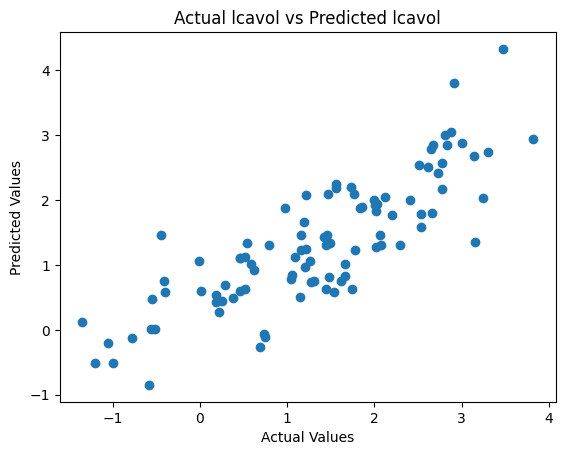

In [15]:
predictions = results.get_prediction(X)
y_predictions = predictions.predicted_mean

plt.scatter(y, y_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual lcavol vs Predicted lcavol')
plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

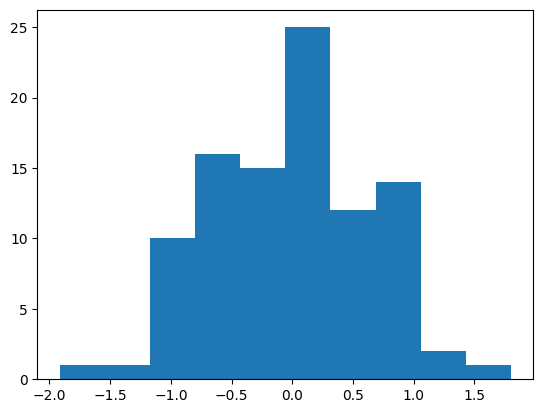

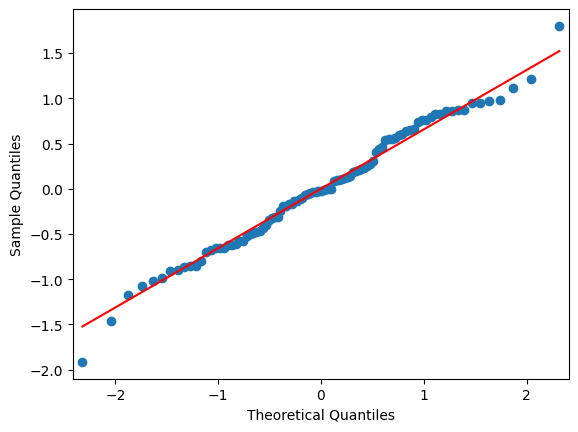

Residual Sum of Squares (RSS): 41.8141


In [16]:
y_residuals = y - y_predictions
plt.hist(y_residuals)
plt.show()
sm.qqplot(y_residuals, line='s')
plt.show()
rss = sigma_sq = np.sum(y_residuals**2)
print(f"Residual Sum of Squares (RSS): {rss:.4f}")

It looks like the residuals are normally distributed. In the histogram, the bars are highest in the middle (around 0) and get lower as we move to the sides even if it's not a perfect bell shape. Most of the histogram bars are inside this interval -1 to +1 which represent -1 standard deviation to +1 standard deviation. A normally distributed curve should have 68% of the content inside this interval and 95% inside the -2 to +2 interval and that seems pretty accurate. In the QQ-plot it looks like the residuals are normally distributed because the blue dots follow the red straight line very closely.

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [17]:
df_new = df_enc.drop(columns=['lpsa', 'lcp'])
X_new = df_new.drop(columns=['lcavol'])
y_new = df_new['lcavol']
model_new = sm.OLS(y_new, X_new)
results_new = model_new.fit()
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        15:45:30   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.026       0.070       1.100
age            0.0073      0.015      0.497      0.621      -0.022       0.036
lbph          -0.0746      0.077     -0.967      0.336      -0.228       0.079
pgg45         -0.0004      0.006     -0.076      0.939      -0.012       0.011
svi_1          1.0246      0.271      3.774      0.000       0.485       1.564
gleason_7      0.8007      0.274      2.918      0.004       0.255       1.346
gleason_8      0.6869      0.960      0.715      0.476      -1.221       2.595
gleason_9      1.1726      0.644      1.820      0.072      -0.108       2.453
intercept     -1.9717      1.159     -1.701      0.092      -4.275       0.332
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.473
Skew:                          -0.013   Prob(JB):                        0.789
Kurtosis:                       2.659   Cond. No.                         882.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Before:** R-squared:	0.686, Adj. R-squared:	0.650
Statistically significant parameters age, lcp, pgg45, lpsa

**Now:** R-squared:	0.433 Adj. R-squared:	0.381
Statistically significant parameters: lweight, svi_1, gleason_7

Removing lpsa and lcp reduces the model's performance, as the Adjusted $R^2$ goes from 0.650 to 0.381. As we already said in 1(c) lpsa and lcp seemed to be mostly correlated to lcavol and this also indicates that these two predictors were important for the model. 

We also see a difference in significant variables. While they were removed, other variables lweight, svi_1 and gleason_7 became statistically significant. It's likely that lweight and svi_1 share some information with lpsa and lcp and when they are removed some effects of lcavol could be explained more by lweight, svi_1 and gleason_7. 

When finding the regression model we use the entire matrix of predicotrs, the X matrix so when we remove lpsa and lcp we change the X. After finding the regression model we test which parameters are statistically significant. So if a variable is significant depends on which other variables are included in the regression.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [18]:
import itertools as it
from sklearn.linear_model import LinearRegression
predictors = ['lpsa', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# define  
best_combo = None # combination of predictors with minimum RSS (to be assigned later)
min_rss = float('inf') # value of rss for best_combo

# generates all 8 choose 1 combinations of predictors 
for combo in it.combinations(predictors, 1):
    # combo will be ('lpsa', 'lweight'), then ('lpsa', 'age'), etc.
    X = df[list(combo)]  # create dataframe with two columns corresponding to each iteration of combo
    y = df[['lcavol']]   # dataframe containing lcavol which is what we want to predict  
    
    model = LinearRegression() # create the model
    model.fit(X, y) # fit the model on each combo 
    y_pred = model.predict(X) # predict lcavol 
    
    rss = np.sum((y - y_pred)**2)
    print(f"Predictors {combo} : RSS = {rss}")

    if rss < min_rss:
        min_rss = rss
        best_combo = combo
print(f"\n \nMinimum RSS is {min_rss} for predictors {best_combo}")
    

Predictors ('lpsa',) : RSS = 61.42090741678992
Predictors ('lweight',) : RSS = 122.8647121691087
Predictors ('age',) : RSS = 126.60774005098094
Predictors ('lbph',) : RSS = 133.25928049560656
Predictors ('svi',) : RSS = 94.63771343635253
Predictors ('lcp',) : RSS = 72.54141331505467
Predictors ('gleason',) : RSS = 108.42296026082232
Predictors ('pgg45',) : RSS = 108.28029771158447

 
Minimum RSS is 61.42090741678992 for predictors ('lpsa',)


In [19]:
predictors = ['lpsa', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

# define  

# generates all 8 choose 1 combinations of predictors 
for i in range(0,9):
    best_combo = None # combination of predictors with minimum RSS (to be assigned later)
    min_rss = float('inf') # value of rss for best_combo
    if i == 0:
        X = pd.DataFrame(np.zeros((len(df), 1)), columns=['intercept'])
        y = df[['lcavol']]   # dataframe containing lcavol which is what we want to predict
        beta_0 = np.average(y)# formula from complementary 
        y_pred = beta_0
        rss_k0 = np.sum((y - y_pred)**2)
        print(f"\n \nMinimum RSS is {rss_k0} for no predictors")
    elif i != 0: 
        for combo in it.combinations(predictors, i):
            # combo will be ('lpsa', 'lweight'), then ('lpsa', 'age'), etc.
            X = df[list(combo)]  # create dataframe with two columns corresponding to each iteration of combo
            y = df[['lcavol']]   # dataframe containing lcavol which is what we want to predict  
            
            model = LinearRegression() # create the model
            model.fit(X, y) # fit the model on each combo 
            y_pred = model.predict(X) # predict lcavol 
            
            rss = np.sum((y - y_pred)**2)
            # print(f"Predictors {combo} : RSS = {rss}")

            if rss < min_rss:
                min_rss = rss
                best_combo = combo
        print(f"\n \nMinimum RSS is {min_rss} for predictors {best_combo}")

# COME BACK TO HERE
        # Store results in a list to collect all min_rss values
        if i == 0:
            rss_values_3b.append(rss_k0)
            best_models_3b[i] = ([], rss_k0)
        else:
            rss_values_3b.append(min_rss)
            best_models_3b[i] = (list(best_combo), min_rss)

# Create dataframe with results
results_df = pd.DataFrame({
    'Model Size (k)': list(best_models_3b.keys()),
    'Min RSS': [best_models_3b[k][1] for k in best_models_3b.keys()],
    'Predictors': [best_models_3b[k][0] for k in best_models_3b.keys()]
    })
print(results_df)



 
Minimum RSS is 133.359033889223 for no predictors

 
Minimum RSS is 61.42090741678992 for predictors ('lpsa',)


NameError: name 'rss_values_3b' is not defined

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.